# <b>Credit Card Custormers EDA - Churn Classification </b>

Link for dataset: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

This dataset shows that some customers are leaving a credit card service. So, our job will be to investigate the data and try do predict who is gonna get churned, so we can contact proactively these customers to avoid this process

In [1]:
# Just for install some libraries
#import sys
#!{sys.executable} -m pip install lightgbm

In [2]:
# Importing libraries

import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shap
from ydata_profiling import ProfileReport
from matplotlib import gridspec

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## <b>Get and Inspect the Data</b>

In [3]:
# Read the data
df = pd.read_csv("BankChurners.csv")

In [4]:
# Seeing all the columns names:
for column_headers in df.columns:
    print(column_headers)

CLIENTNUM
Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


## <b>Description of the dataset:</b>

- CLIENTNUM -> Client number
- Attrition_Flag -> Show if the account is closed (1) or not (0)
- Customer_Age -> The age of the customers
- Gender -> The gender of the customers
- Dependent_count -> Number of dependents a costumer have
- Education_Level -> Educational qualification of the customer
- Marital_Status -> If a customer is Married, Single, Divorced or Unknown
- Income_Category -> Annual income of the customers
- Card_Category -> Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book -> Period of relationship with bank
- Total_Relationship_Count ->Total number of products held by the customer
- Months_Inactive_12_mon -> Number of months inactive in the last 12 months
- Contacts_Count_12_mon -> Number of contacts in the last 12 months
- Credit_Limit -> Credit Limit on the Credit Card
- Total_Revolving_Bal -> 
- Avg_Open_To_Buy -> Open to buy credit line (average of last 12 months)
- Total_Amt_Chng_Q4_Q1 -> Change n transaction amount (Q4 over Q1)
- Total_Trans_Amt -> Total transaction amount (last 12 months)
- Total_Trans_Ct -> Total transaction count (last 12 months)
- Total_Ct_Chng_Q4_Q1 -> Change in transaction count (Q4 over Q1)
- Avg_Utilization_Ratio -> Average card utilization ratio


In [5]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

We will drop the CLIENTNUM column and the last 2 columns

In [6]:
columns = ["CLIENTNUM","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
           "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]

In [7]:
df.drop(columns=columns, axis=1, inplace=True)

In [8]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [9]:
# Seeing the data types
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

All the features have compatible data types

In [95]:
# Creating a profile for automated report
profile = ProfileReport(df, title="Credit_Card_Churn_Report")

In [96]:
# Exporting to a file
profile.to_file("Credit_Card_Churn_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Checking our target feature

In [97]:
# Checking null values
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

None fo the features have missing values

In [98]:
# Generating a descriptive statistics about the data
df.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

The features in general have a mean close to the median value, but the <b>"Credit_Limit"</b> and <b>"Avg_Open_To_Buy"</b> mean differ from the median. We will investigate this behavior through plots

### Plotar gráficos em forma de histograma, um que indica a porcentagem e outro com os valores

In [99]:
fig = px.histogram(df,
             "Attrition_Flag",
             color="Attrition_Flag",
             hover_name="Attrition_Flag",
)

fig.show()

Calcular porcentagem de cada um

Veryfying income category

In [100]:
df["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [101]:
df["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

(array([1402.,    0., 3561.,    0., 1535.,    0., 1790.,    0.,  727.,
        1112.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

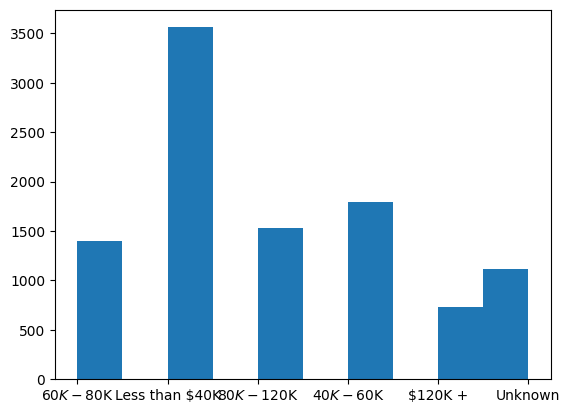

In [102]:
plt.hist(df["Income_Category"])


In [103]:
px.histogram(df, 
             x="Income_Category", 
             color="Attrition_Flag",
)

Education Level

In [104]:
px.histogram(df, 
             x="Education_Level", 
             color="Attrition_Flag",
             hover_name="Attrition_Flag",
)

In [105]:
px.histogram(df, 
             x="Gender", 
             color="Attrition_Flag",
             hover_name="Attrition_Flag",
)

In [106]:
px.histogram(df, 
             x="Card_Category", 
             color="Attrition_Flag",
             hover_name="Attrition_Flag",
)

In [107]:
px.histogram(df, 
             x="Dependent_count", 
             color="Attrition_Flag",
             hover_name="Attrition_Flag",
)

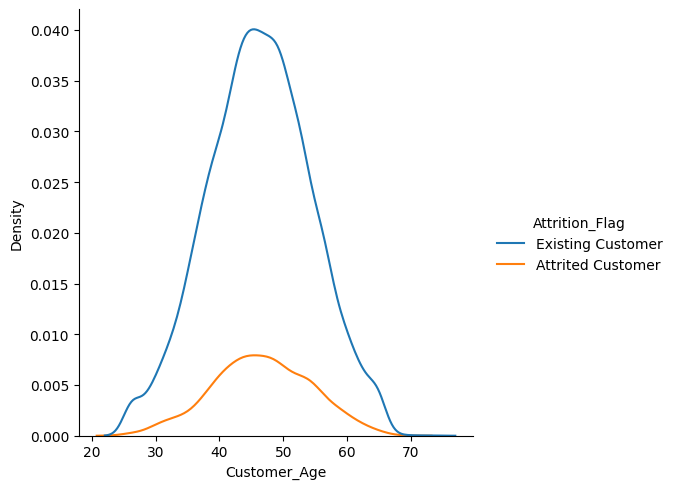

In [108]:
sns.displot(df,
            x="Customer_Age",
            kind="kde",
            hue="Attrition_Flag"
)

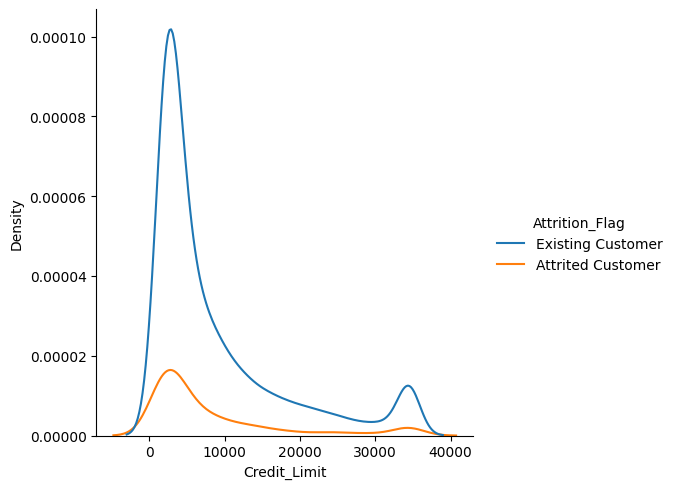

In [109]:
sns.displot(df,
            x="Credit_Limit",
            kind="kde",
            hue="Attrition_Flag"
)

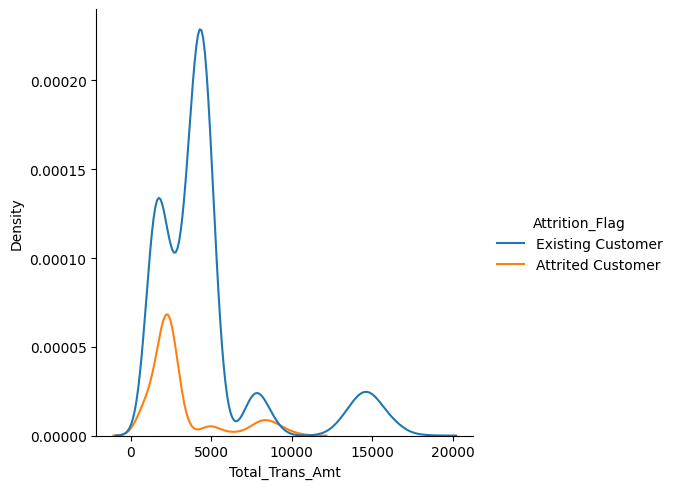

In [110]:
sns.displot(df,
            x="Total_Trans_Amt",
            kind="kde",
            hue="Attrition_Flag"
)

A densidade tem a ver com a quantidade de pessoas em cada grupo do "hue"?

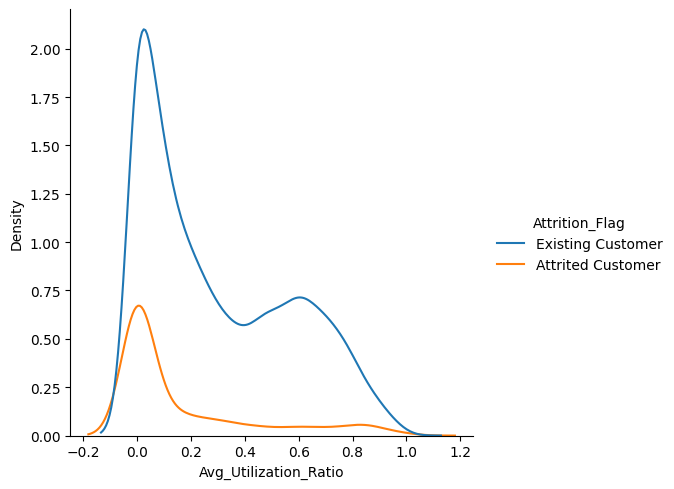

In [111]:
sns.displot(df,
            x="Avg_Utilization_Ratio",
            kind="kde",
            hue="Attrition_Flag"
)

In [112]:
# Select numerical feature and exclude categorical feature
num_df = df.select_dtypes(exclude=["object"])
num_df.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

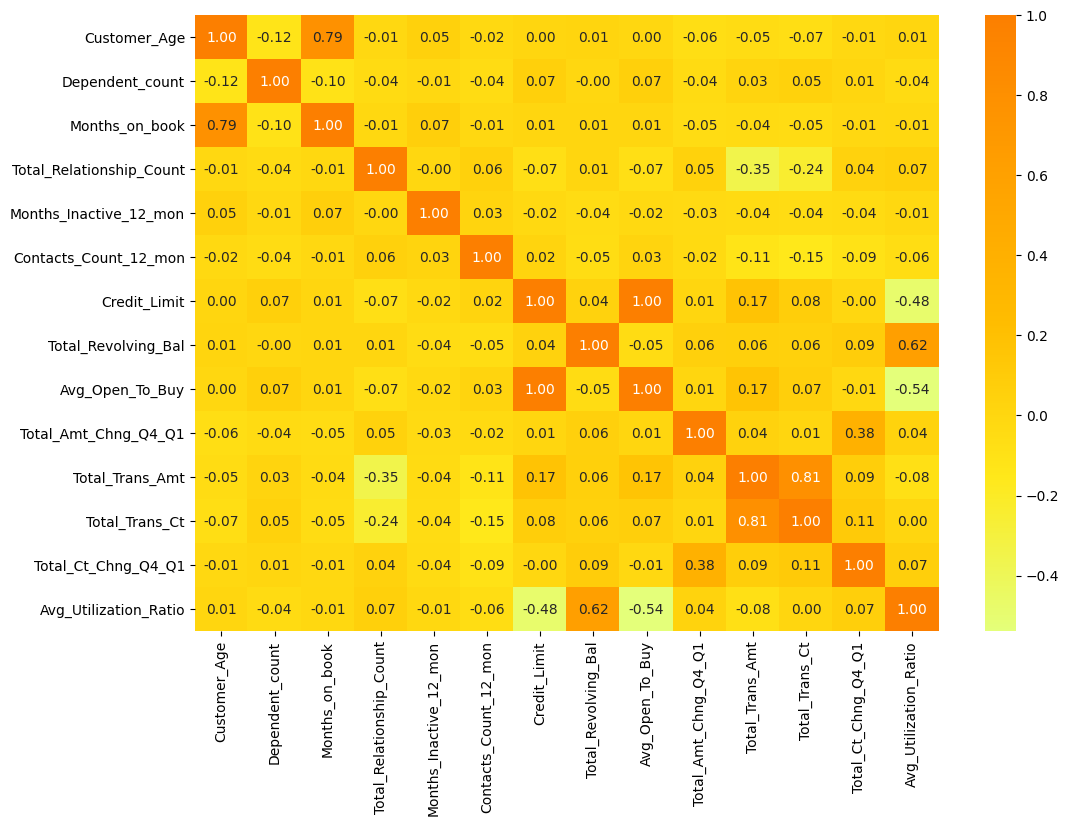

In [113]:
# Check Pearson's correlation of the numerical features
fig, ax = plt.subplots(figsize=(12,8))

heatmap = sns.heatmap(
    num_df.corr(),
    cmap="Wistia",
    annot=True,
    fmt=".2f"
)

corr_matrix = num_df.corr()

Verificar como alterar os valores dentro da coluna "Income Category"

A ordem de grandeza das features varia um pouco, não seria bom normalizar os dados?

Preciso preparar os dados para testar os modelos de classificação.

Isso é necessário pois há muitas features que são categóricas com mais de duas classificações

O que penso fazer é separar a variável target do restante do dataframe

Depois separar o dataframe restante em numérico e categórico

Depois transformar o dataframe categórico utilizando o "one hot encoding" do sklearn

Depois junto os dois dataframes novamente

Isso funcionará?

In [114]:
df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

In [115]:
X = df.drop(columns=["Attrition_Flag"])
X

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School        Unknown   
4                40      M                3      Uneducated        Married   
...             ...    ...              ...             ...            ...   
10122            50      M                2        Graduate         Single   
10123            41      M                2         Unknown       Divorced   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate        Unknown   
10126            43      F                2        Graduate        Married   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0         $60K - $80K          Blue              39                         5   
1      Less than $40K          Blue              44                         6   
2        $80K - $120K          Blue              36                         4   
3      Less than $40K          Blue              34                         3   
4         $60K - $80K          Blue              21                         5   
...               ...           ...             ...                       ...   
10122     $40K - $60K          Blue              40                         3   
10123     $40K - $60K          Blue              25                         4   
10124  Less than $40K          Blue              36                         5   
10125     $40K - $60K          Blue              36                         4   
10126  Less than $40K        Silver              25                         6   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                           1                      3       12691.0   
1                           1                      2        8256.0   
2                           1                      0        3418.0   
3                           4                      1        3313.0   
4                           1                      0        4716.0   
...                       ...                    ...           ...   
10122                       2                      3        4003.0   
10123                       2                      3        4277.0   
10124                       3                      4        5409.0   
10125                       3                      3        5281.0   
10126                       2                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777          11914.0                 1.335   
1                      864           7392.0                 1.541   
2                        0           3418.0                 2.594   
3                     2517            796.0                 1.405   
4                        0           4716.0                 2.175   
...                    ...              ...                   ...   
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...           

In [116]:
X_cat = X.select_dtypes(include=["object", "bool"]).columns
X_cat

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [117]:
X_num = X.select_dtypes(include=["int64", "float64"]).columns
X_num

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [118]:
X_num_df = X[X_num]
X_num_df

Customer_Age  Dependent_count  Months_on_book  \
0                45                3              39   
1                49                5              44   
2                51                3              36   
3                40                4              34   
4                40                3              21   
...             ...              ...             ...   
10122            50                2              40   
10123            41                2              25   
10124            44                1              36   
10125            30                2              36   
10126            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                    1.625                  0.061  
1                    3.714                  0.105  
2                    2.333                  0.000  
3                    2.333                  0.760  
4                    2.500                  0.000  
...                    ...                    ...  
10122                0.857                  0.462  
10123                0.683                  0.511  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189  

[10127 rows x 14 columns]

## Testar a classificação apenas com variáveis numéricas

In [119]:
X_cat_df = X[X_cat]
X_cat_df

Gender Education_Level Marital_Status Income_Category Card_Category
0          M     High School        Married     $60K - $80K          Blue
1          F        Graduate         Single  Less than $40K          Blue
2          M        Graduate        Married    $80K - $120K          Blue
3          F     High School        Unknown  Less than $40K          Blue
4          M      Uneducated        Married     $60K - $80K          Blue
...      ...             ...            ...             ...           ...
10122      M        Graduate         Single     $40K - $60K          Blue
10123      M         Unknown       Divorced     $40K - $60K          Blue
10124      F     High School        Married  Less than $40K          Blue
10125      M        Graduate        Unknown     $40K - $60K          Blue
10126      F        Graduate        Married  Less than $40K        Silver

[10127 rows x 5 columns]

In [120]:
X_cat_one_hot_encoded = pd.get_dummies(X_cat_df)

In [121]:
X_cat_one_hot_encoded

Gender_F  Gender_M  Education_Level_College  Education_Level_Doctorate  \
0             0         1                        0                          0   
1             1         0                        0                          0   
2             0         1                        0                          0   
3             1         0                        0                          0   
4             0         1                        0                          0   
...         ...       ...                      ...                        ...   
10122         0         1                        0                          0   
10123         0         1                        0                          0   
10124         1         0                        0                          0   
10125         0         1                        0                          0   
10126         1         0                        0                          0   

       Education_Level_Graduate  Education_Level_High School  \
0                             0                            1   
1                             1                            0   
2                             1                            0   
3                             0                            1   
4                             0                            0   
...                         ...                          ...   
10122                         1                            0   
10123                         0                            0   
10124                         0                            1   
10125                         1                            0   
10126                         1                            0   

       Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           1   
...                              ...                         ...   
10122                              0                           0   
10123                              0                           0   
10124                              0                           0   
10125                              0                           0   
10126                              0                           0   

       Education_Level_Unknown  Marital_Status_Divorced  ...  \
0                            0                        0  ...   
1                            0                        0  ...   
2                            0                        0  ...   
3                            0                        0  ...   
4                            0                        0  ...   
...                        ...                      ...  ...   
10122                        0                        0  ...   
10123                        1                        1  ...   
10124                        0                        0  ...   
10125                        0                        0  ...   
10126                        0                        0  ...   

       Income_Category_$120K +  Income_Category_$40K - $60K  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
...                        ...                          ...   
10122                        0                            1   
10123                        0                            1   
10124                        0                            0   
10125                        0                   

In [122]:
X_encoded = pd.concat([X_num_df, X_cat_one_hot_encoded], axis=1, join="inner")

In [123]:
X_encoded

Customer_Age  Dependent_count  Months_on_book  \
0                45                3              39   
1                49                5              44   
2                51                3              36   
3                40                4              34   
4                40                3              21   
...             ...              ...             ...   
10122            50                2              40   
10123            41                2              25   
10124            44                1              36   
10125            30                2              36   
10126            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  Income_Category_$120K +  \
0              11914.0                 1.335  ...                        0   
1               7392.0                 1.541  ...                        0   
2               3418.0                 2.594  ...                        0   
3                796.0                 1.405  ...                        0   
4               4716.0                 2.175  ...                        0   
...                ...                   ...  ...                      ...   
10122           2152.0                 0.703  ...                        0   
10123           2091.0                 0.804  ...                        0   
10124           5409.0                 0.819  ...                        0   
10125           5281.0                 0.535  ...                        0   
10126           8427.0                 0.703  ...                        0   

       Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                                0                            1   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            1   
...                            ...                          ...   
10122                            1                            0   
10123                            1                            0   
10124                            0                            0   
10125                            1                            0   
10126                            0                            0   

       Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0      

In [124]:
y = df["Attrition_Flag"]
y

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,
                                                   test_size=0.33,
                                                   stratify=y)

In [127]:
X_train.shape, X_test.shape

((6785, 37), (3342, 37))

In [128]:
y_train.shape, y_test.shape

((6785,), (3342,))

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
knn = KNeighborsClassifier(n_neighbors=1)

In [131]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [132]:
knn_predictions = knn.predict(X_test)

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

In [134]:
print(confusion_matrix(y_test, knn_predictions))

[[ 326  211]
 [ 202 2603]]


In [135]:
print(classification_report(y_test, knn_predictions))

                   precision    recall  f1-score   support

Attrited Customer       0.62      0.61      0.61       537
Existing Customer       0.93      0.93      0.93      2805

         accuracy                           0.88      3342
        macro avg       0.77      0.77      0.77      3342
     weighted avg       0.88      0.88      0.88      3342



Choosing a K value

In [136]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

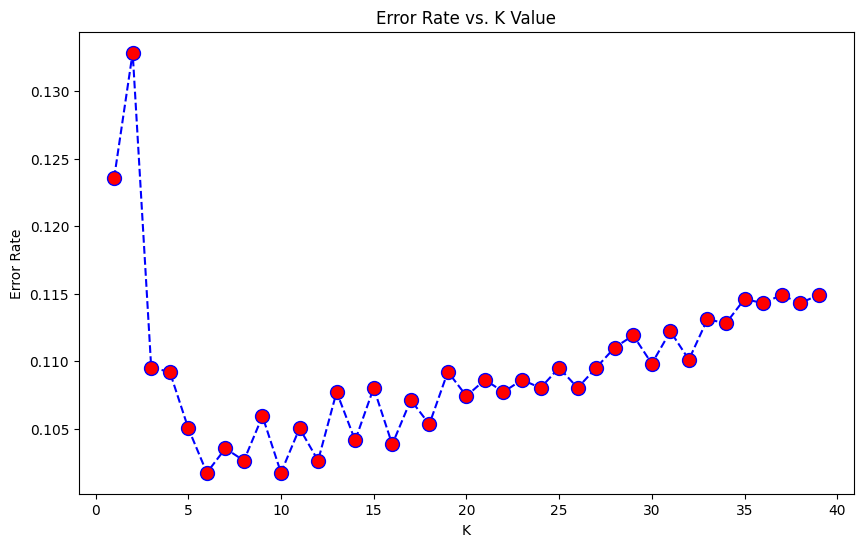

In [137]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We see that k = 11 give us the minimul error rate

In [138]:
knn = KNeighborsClassifier(n_neighbors=11)

In [139]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [140]:
knn_predictions = knn.predict(X_test)

In [141]:
print(confusion_matrix(y_test, knn_predictions))

[[ 285  252]
 [  99 2706]]


In [142]:
print(classification_report(y_test, knn_predictions))

                   precision    recall  f1-score   support

Attrited Customer       0.74      0.53      0.62       537
Existing Customer       0.91      0.96      0.94      2805

         accuracy                           0.89      3342
        macro avg       0.83      0.75      0.78      3342
     weighted avg       0.89      0.89      0.89      3342



In [143]:
print("Training set score: {:.4f}".format(
    knn.score(X_train, y_train)))

print("Test set score: {:.4f}".format(
    knn.score(X_test, y_test)))

Training set score: 0.9066
Test set score: 0.8950


In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
tree_classifier = DecisionTreeClassifier()

In [146]:
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [147]:
tree_predictions = tree_classifier.predict(X_test)

In [148]:
print(confusion_matrix(y_test, tree_predictions))

[[ 420  117]
 [ 104 2701]]


In [149]:
print(classification_report(y_test, tree_predictions))

                   precision    recall  f1-score   support

Attrited Customer       0.80      0.78      0.79       537
Existing Customer       0.96      0.96      0.96      2805

         accuracy                           0.93      3342
        macro avg       0.88      0.87      0.88      3342
     weighted avg       0.93      0.93      0.93      3342



In [150]:
print("Training set score: {:.4f}".format(
    tree_classifier.score(X_train, y_train)))

print("Test set score: {:.4f}".format(
    tree_classifier.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9339


In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
forest_classifier = RandomForestClassifier()

In [153]:
forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [154]:
forest_predictions = forest_classifier.predict(X_test)

In [155]:
print(confusion_matrix(y_test, forest_predictions))

[[ 415  122]
 [  23 2782]]


In [156]:
print(classification_report(y_test, forest_predictions))

                   precision    recall  f1-score   support

Attrited Customer       0.95      0.77      0.85       537
Existing Customer       0.96      0.99      0.97      2805

         accuracy                           0.96      3342
        macro avg       0.95      0.88      0.91      3342
     weighted avg       0.96      0.96      0.95      3342



In [157]:
print("Training set score: {:.4f}".format(
    forest_classifier.score(X_train, y_train)))

print("Test set score: {:.4f}".format(
    forest_classifier.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9566


In [158]:
import lightgbm as lgb

In [159]:
lgb_classifier = lgb.LGBMClassifier()

In [160]:
lgb_classifier.fit(X_train, y_train)

LGBMClassifier()

In [161]:
lgb_predictions = lgb_classifier.predict(X_test)

In [162]:
print(confusion_matrix(y_test, lgb_predictions))

[[ 477   60]
 [  29 2776]]


In [163]:
print(classification_report(y_test, lgb_predictions))

                   precision    recall  f1-score   support

Attrited Customer       0.94      0.89      0.91       537
Existing Customer       0.98      0.99      0.98      2805

         accuracy                           0.97      3342
        macro avg       0.96      0.94      0.95      3342
     weighted avg       0.97      0.97      0.97      3342



In [164]:
print("Training set score: {:.4f}".format(
    lgb_classifier.score(X_train, y_train)))

print("Test set score: {:.4f}".format(
    lgb_classifier.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9734


Teste dos loops conforme código do Luan para gerar os boxplot depois

In [165]:
df.head(3)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000

In [166]:
# X dataframe para teste dos modelos após one hot encoded
X_encoded.head(3)

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777          11914.0                 1.335  ...   
1                  864           7392.0                 1.541  ...   
2                    0           3418.0                 2.594  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            1                             0   
1                            0                             0   
2                            0                             1   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  

[3 rows x 37 columns]

In [167]:
# Vetor target do modelo de classificação
y.head(3)

0    Existing Customer
1    Existing Customer
2    Existing Customer
Name: Attrition_Flag, dtype: object

In [168]:
df_transformado = df
df_transformado.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [169]:
df_transformado["Churn"] = np.where(df_transformado["Attrition_Flag"] == "Attrited Customer", 1, 0)

In [170]:
df_transformado.head(3)

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   

   Total_Relationship_Count  ...  Contacts_Count_12_mon  Credit_Limit  \
0                         5  ...                      3       12691.0   
1                         6  ...                      2        8256.0   
2                         4  ...                      0        3418.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   

   Avg_Utilization_Ratio  Churn  
0                  0.061      0  
1                  0.105      0  
2                  0.000      0  

[3 rows x 21 columns]

In [171]:
y = df_transformado["Churn"]

In [172]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Churn, Length: 10127, dtype: int32

In [173]:
from sklearn import metrics

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

In [175]:
from tqdm import tqdm

In [176]:
# Pré-alocando
tree_precision = []
tree_accuracy = []
tree_recall = []
tree_f1 = []

for i in tqdm(range(100)):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,
                                                        test_size=0.33,
                                                        stratify=y)
    tree_classifier = DecisionTreeClassifier()
    tree_classifier.fit(X_train, y_train)
    # Metrics
    precision = metrics.precision_score(y_test, tree_classifier.predict(X_test))
    accuracy = metrics.accuracy_score(y_test, tree_classifier.predict(X_test))
    recall = metrics.recall_score(y_test, tree_classifier.predict(X_test))
    f1 = metrics.f1_score(y_test, tree_classifier.predict(X_test))
    # Append values
    tree_precision.append(precision)
    tree_accuracy.append(accuracy)
    tree_recall.append(recall)
    tree_f1.append(f1)

100%|██████████| 100/100 [00:09<00:00, 10.31it/s]


In [177]:
# Pré-alocando
forest_precision = []
forest_accuracy = []
forest_recall = []
forest_f1 = []

for i in tqdm(range(100)):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,
                                                        test_size=0.33,
                                                        stratify=y)
    forest_classifier = RandomForestClassifier()
    forest_classifier.fit(X_train, y_train)
    # Metrics
    precision = metrics.precision_score(y_test, forest_classifier.predict(X_test))
    accuracy = metrics.accuracy_score(y_test, forest_classifier.predict(X_test))
    recall = metrics.recall_score(y_test, forest_classifier.predict(X_test))
    f1 = metrics.f1_score(y_test, forest_classifier.predict(X_test))
    # Append values
    forest_precision.append(precision)
    forest_accuracy.append(accuracy)
    forest_recall.append(recall)
    forest_f1.append(f1)

100%|██████████| 100/100 [02:20<00:00,  1.40s/it]


In [178]:
# Pré-alocando
lgb_precision = []
lgb_accuracy = []
lgb_recall = []
lgb_f1 = []

for i in tqdm(range(100)):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,
                                                        test_size=0.33,
                                                        stratify=y)
    lgb_classifier = lgb.LGBMClassifier()
    lgb_classifier.fit(X_train, y_train)
    # Metrics
    precision = metrics.precision_score(y_test, lgb_classifier.predict(X_test))
    accuracy = metrics.accuracy_score(y_test, lgb_classifier.predict(X_test))
    recall = metrics.recall_score(y_test, lgb_classifier.predict(X_test))
    f1 = metrics.f1_score(y_test, lgb_classifier.predict(X_test))
    # Append values
    lgb_precision.append(precision)
    lgb_accuracy.append(accuracy)
    lgb_recall.append(recall)
    lgb_f1.append(f1)

100%|██████████| 100/100 [00:40<00:00,  2.45it/s]


In [179]:
print(np.mean(tree_precision)),
print(np.mean(tree_accuracy)),
print(np.mean(tree_recall)),
print(np.mean(tree_f1))

0.8001116400266775
0.9351885098743269
0.796052141527002
0.7978577925780739


In [180]:
print(np.mean(forest_precision)),
print(np.mean(forest_accuracy)),
print(np.mean(forest_recall)),
print(np.mean(forest_f1))

0.9269568869025242
0.9543028126870141
0.7769646182495342
0.8452312381702827


In [181]:
print(np.mean(lgb_precision)),
print(np.mean(lgb_accuracy)),
print(np.mean(lgb_recall)),
print(np.mean(lgb_f1))

0.932732429558188
0.9717564332734889
0.8884543761638735
0.9099517583046702


In [182]:
precision_comparison = pd.DataFrame({"DecisionTree":tree_precision, 
                                     "RandomForest":forest_precision,
                                     "LGBM":lgb_precision})

accuracy_comparison = pd.DataFrame({"DecisionTree":tree_accuracy, 
                                    "RandomForest":forest_accuracy,
                                    "LGBM":lgb_accuracy})

recall_comparison = pd.DataFrame({"DecisionTree":tree_recall, 
                                  "RandomForest":forest_recall,
                                  "LGBM":lgb_recall})

f1_comparison = pd.DataFrame({"DecisionTree":tree_f1, 
                              "RandomForest":forest_f1,
                              "LGBM":lgb_f1})


[Text(0.5, 1.0, 'Precision Score')]

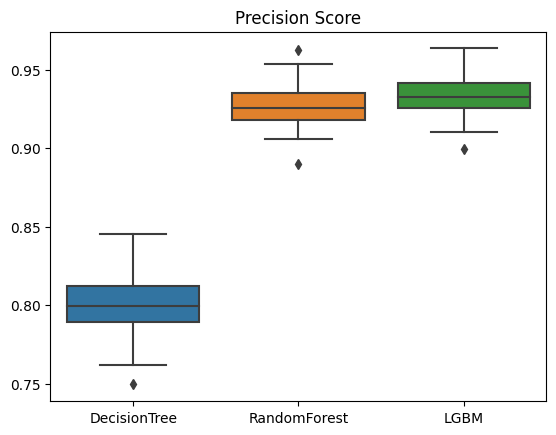

In [183]:
#fig = plt.figure(figsize = (20,20))
sns.boxplot(data=precision_comparison).set(title="Precision Score")

[Text(0.5, 1.0, 'Accuracy Score')]

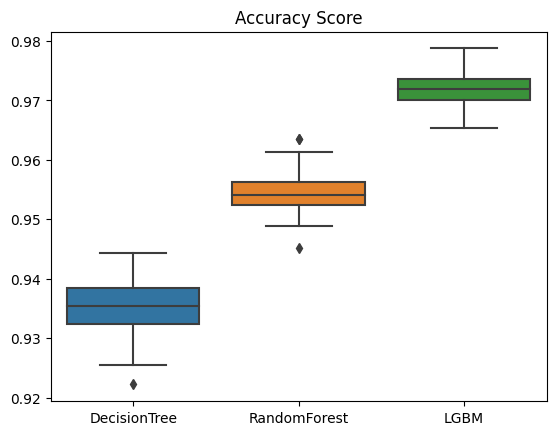

In [184]:
#fig = plt.figure(figsize = (20,20))
sns.boxplot(data=accuracy_comparison).set(title="Accuracy Score")

[Text(0.5, 1.0, 'Recall Score')]

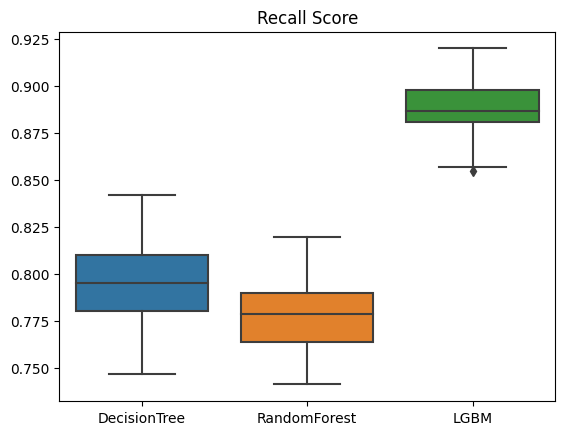

In [185]:
#fig = plt.figure(figsize = (20,20))
sns.boxplot(data=recall_comparison).set(title="Recall Score")

[Text(0.5, 1.0, 'F1 Score')]

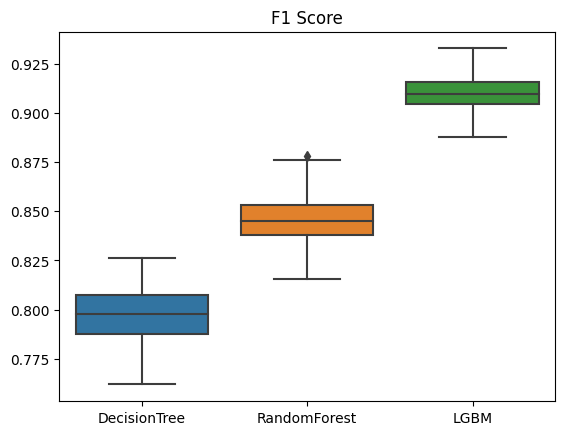

In [186]:
#fig = plt.figure(figsize = (20,20))
sns.boxplot(data=f1_comparison).set(title="F1 Score")

Como verificar se há overfitting?

In [24]:
labels = "Frogs", "Hogs", "Dogs", "Logs"
sizes = [15, 30, 45, 10]

In [28]:
labels

('Frogs', 'Hogs', 'Dogs', 'Logs')

([<matplotlib.patches.Wedge at 0x11ffac0a190>,
 [Text(0.9801071672559598, 0.4993895680663527, 'Frogs'),
  Text(-0.33991877217145816, 1.046162142464278, 'Hogs'),
  Text(-0.49938947630209474, -0.9801072140121813, 'Dogs'),
  Text(1.0461621822461364, -0.3399186497354948, 'Logs')],
 [Text(0.5346039094123416, 0.2723943098543742, '15.0%'),
  Text(-0.18541023936624987, 0.5706338958896061, '30.0%'),
  Text(-0.27239425980114257, -0.5346039349157352, '45.0%'),
  Text(0.5706339175888016, -0.18541017258299716, '10.0%')])

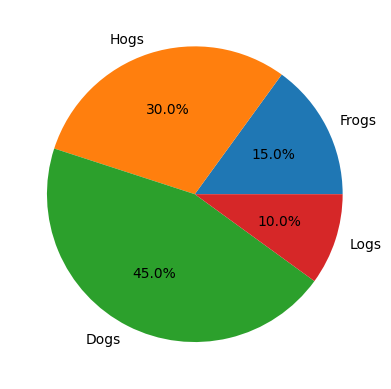

In [15]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [14]:
df_churn = df["Attrition_Flag"]
df_churn.head()

0    Existing Customer
1    Existing Customer
2    Existing Customer
3    Existing Customer
4    Existing Customer
Name: Attrition_Flag, dtype: object

In [30]:
label = df_churn.unique()

In [40]:
teste = df["Attrition_Flag"].value_counts()
teste

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

<AxesSubplot:>

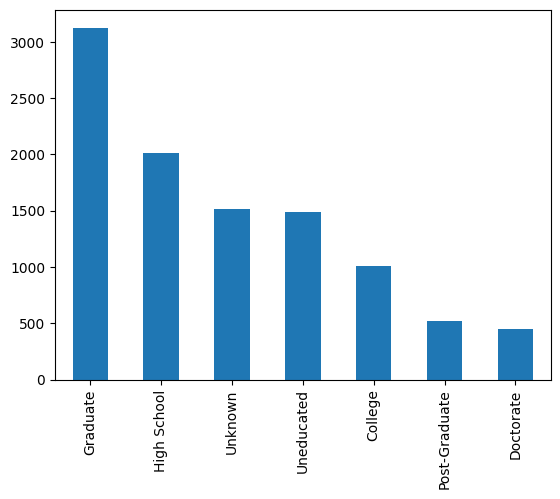

In [42]:
df["Education_Level"].value_counts().plot(kind="bar")

In [61]:
fig = px.histogram(df,
             "Education_Level",
             color="Attrition_Flag",
             hover_name="Attrition_Flag",
)

fig.show()

<AxesSubplot:>

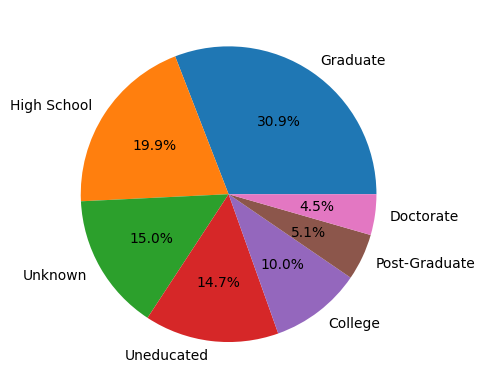

In [60]:
df["Education_Level"].value_counts().plot.pie(autopct='%1.1f%%', label="")

<AxesSubplot:>

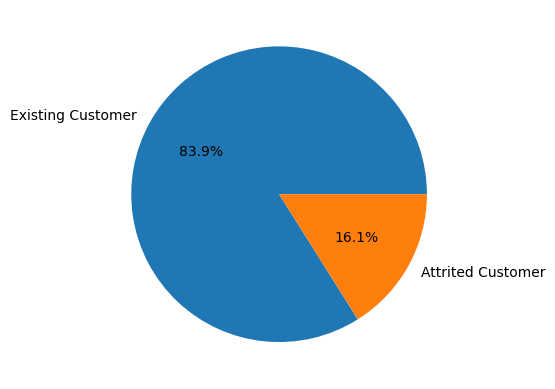

In [47]:
df["Attrition_Flag"].value_counts().plot.pie(autopct='%1.1f%%', label="")

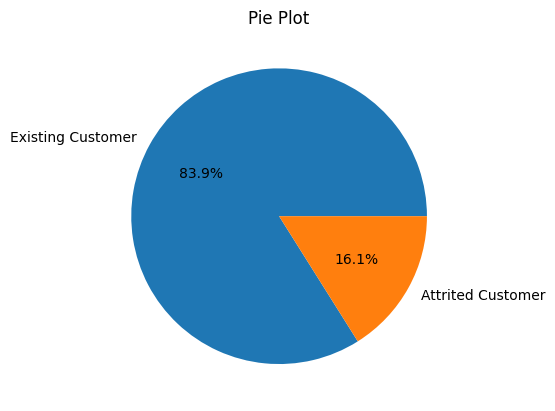

In [55]:
fig, ax = plt.subplots()
ax = df["Attrition_Flag"].value_counts().plot.pie(autopct='%1.1f%%', label = "", title="Pie Plot")

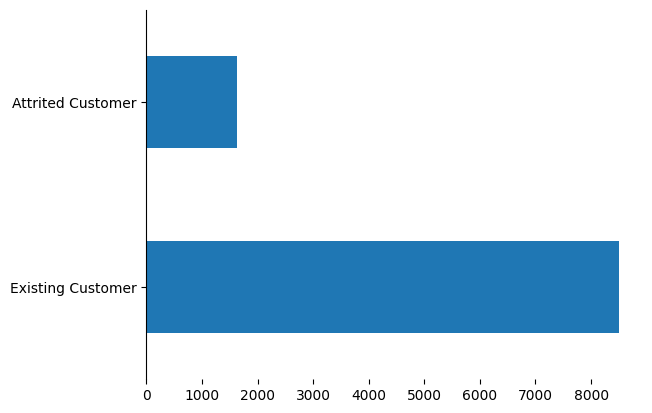

In [71]:
fig, ax = plt.subplots()
ax = df["Attrition_Flag"].value_counts().plot(kind="barh")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_visible(False)

<AxesSubplot:ylabel='Education_Level'>

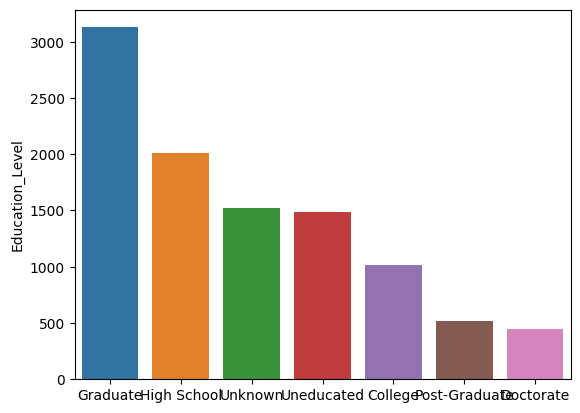

In [66]:
sns.barplot(x=df.Education_Level.value_counts().index, y=df.Education_Level.value_counts())

In [73]:
df.Attrition_Flag.value_counts().index, df.Attrition_Flag.value_counts()

(Index(['Existing Customer', 'Attrited Customer'], dtype='object'),
 Existing Customer    8500
 Attrited Customer    1627
 Name: Attrition_Flag, dtype: int64)

Text(0.5, 1.0, 'title')

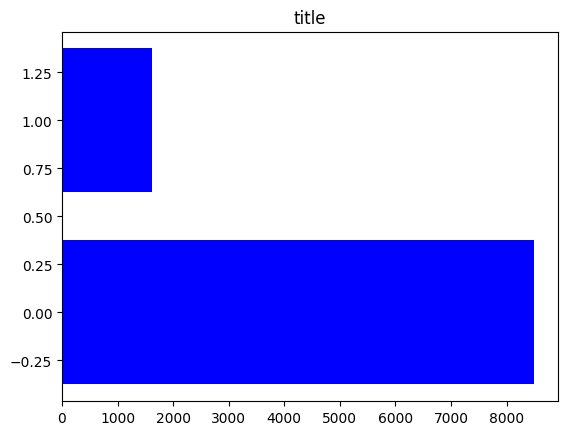

In [76]:
x = df.Attrition_Flag.value_counts().index
y = df.Attrition_Flag.value_counts()

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
#ax.set_yticks(ind+width/2)
#ax.set_yticklabels(x, minor=False)
plt.title('title')
#plt.xlabel('x')
#plt.ylabel('y')      

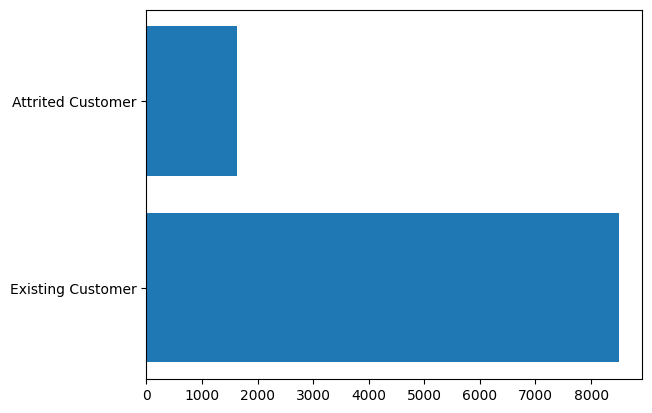

In [78]:
fig, ax = plt.subplots()
bars = ax.barh(df.Attrition_Flag.value_counts().index, df.Attrition_Flag.value_counts())


In [102]:
X = df.Education_Level.value_counts().index
y = df.Education_Level.value_counts()

In [103]:
X

Index(['Graduate', 'High School', 'Unknown', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'],
      dtype='object')

In [104]:
y

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

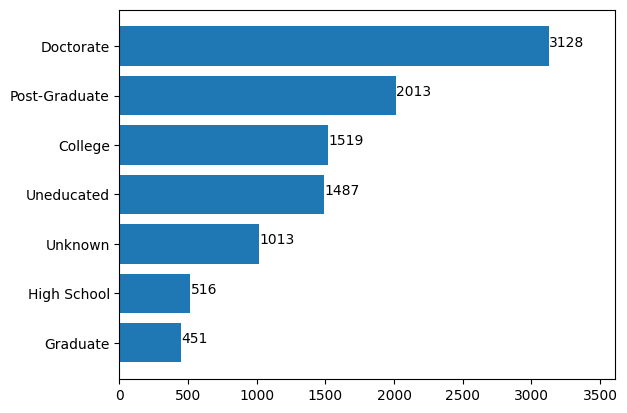

In [121]:
labels = X
values = y.sort_values(ascending=True)


fig, ax = plt.subplots()

ax.barh(labels, values)

for i, value in enumerate(values):
    ax.text(value + 3, i, str(value))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)

plt.show()

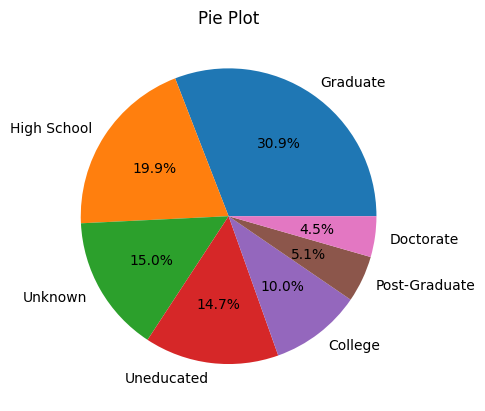

In [122]:
fig, ax = plt.subplots()
ax = df["Education_Level"].value_counts().plot.pie(autopct='%1.1f%%', label = "", title="Pie Plot")

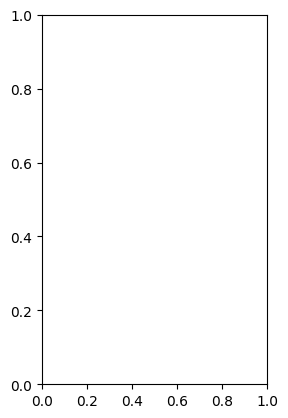

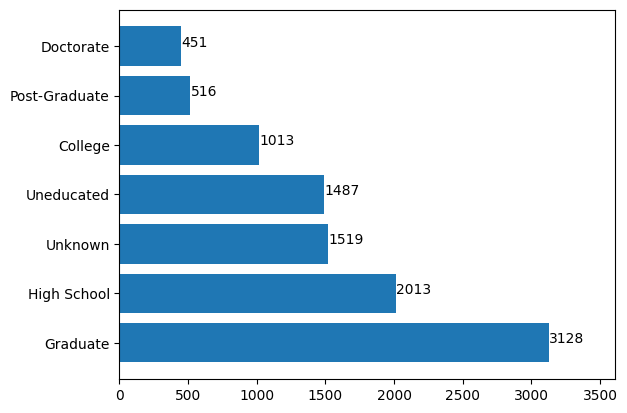

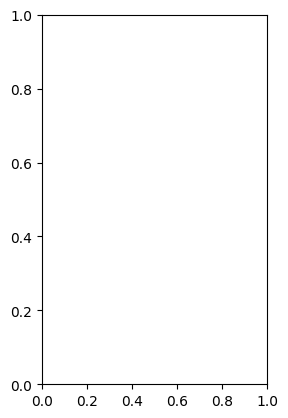

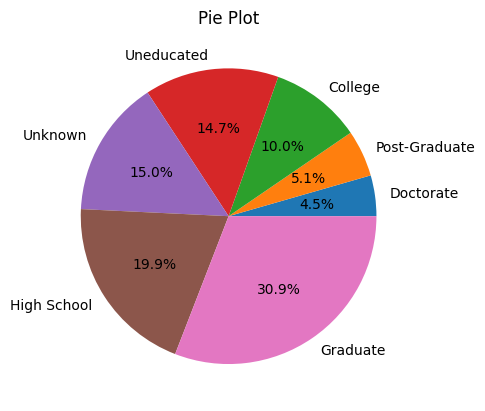

In [119]:
labels = X
values = y

plt.subplot(1,2,1)

fig, ax = plt.subplots()

ax.barh(labels, values)

for i, value in enumerate(values):
    ax.text(value + 3, i, str(value))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)
plt.show()

plt.subplot(1,2,2)
fig, ax = plt.subplots()
ax = df["Education_Level"].value_counts().sort_values(ascending=True).plot.pie(autopct='%1.1f%%', label = "", title="Pie Plot")


In [ ]:
x1 = df.Education_Level.value_counts().index
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].plot(x1, y1)
axes[1].plot(x2, y2)
fig.tight_layout()

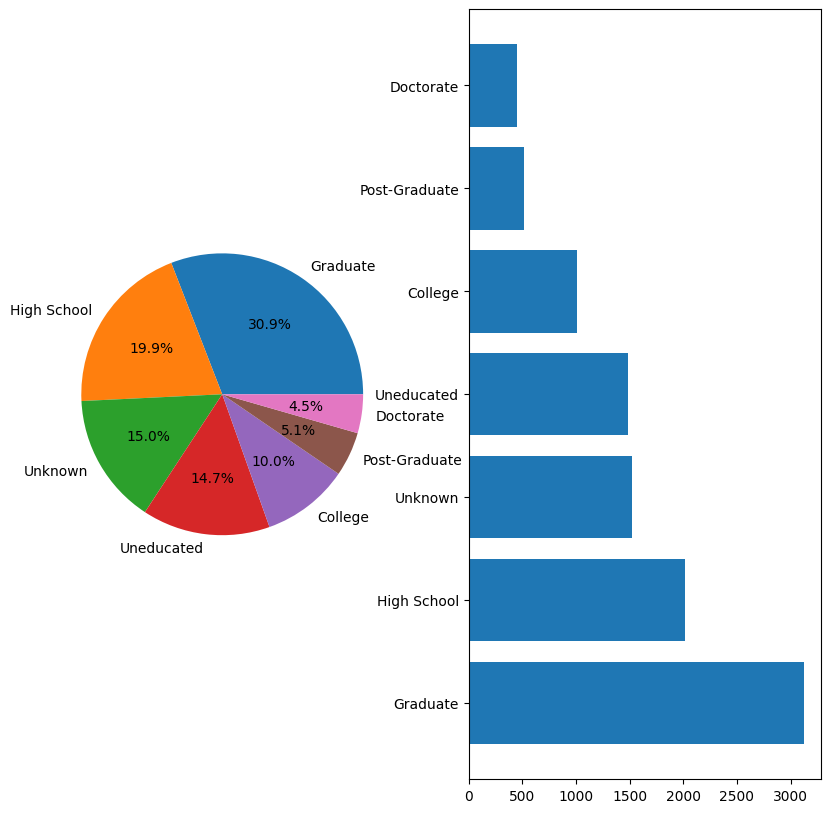

In [116]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to your two pies

# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

labels = df.Education_Level.value_counts().index
values = df.Education_Level.value_counts()
ax1.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
#ax1.title('Gender Composition in 1960')


labels = df.Education_Level.value_counts().index
values = df.Education_Level.value_counts()
ax2.barh(labels, values)
for i, value in enumerate(values):
    ax.text(value + 3, i, str(value))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)
plt.show()

#ax2.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
#ax2.title('Gender Composition in 2016')


In [11]:
df.tail(3)

Attrition_Flag  Customer_Age Gender  Dependent_count  \
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10124                0.818                  0.000  
10125                0.722                  0.000  
10126                0.649                  0.189

In [13]:
df["Attrition_Flag"].unique

<bound method Series.unique of 0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object>

In [17]:
labels = "Existing Customer", "Attrited Customer"
sizes = df.Attrited_Customer.value_Counts()

AttributeError: 'DataFrame' object has no attribute 'Attrited_Customer'

KeyError: 'Existing Customer'

In [26]:
labels = df.Attrition_Flag.value_counts().index
sizes = df.Attrition_Flag.value_counts()

In [27]:
labels

Index(['Existing Customer', 'Attrited Customer'], dtype='object')

In [28]:
sizes

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

Text(0.5, 1.0, 'Proportion of customer')

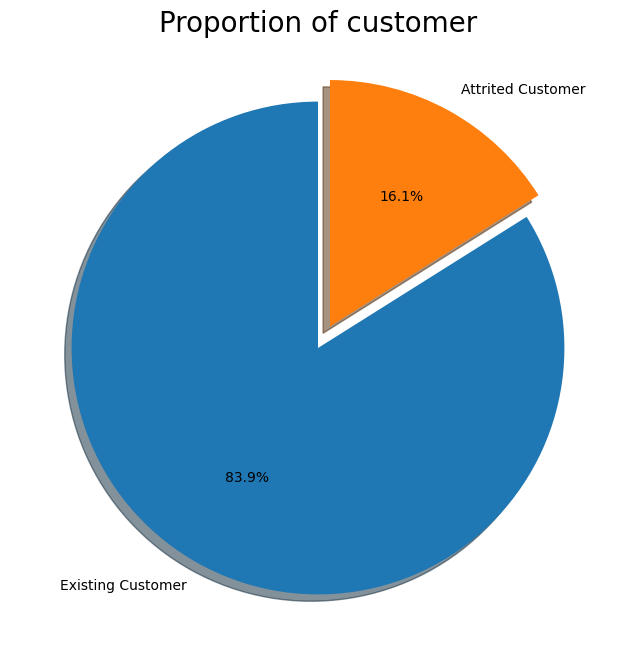

In [32]:
explode=(0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%",
       shadow=True, startangle=90)
plt.title("Proportion of customer", size=20)